# MAPS calculation 

## Import modules

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[23-Nov-23 15:16:45] INFO <module>(): Note import of the following global variables:
None


['C', 'Path', 'a', 'colorsys', 'logger', 'mc', 'namedtuple', 'plt', 'setup_logger', 'sns']
Global variables:
 	- C: color palette
 	- cm: cm to inch conversion factor


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from src.visualisation import colour_tools as cl

In [12]:
# Module variables
_P = cl.colour_palette()

color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')

## Load data

In [2]:
syn = pd.read_csv(
    "../outputs/proportion_singletons_synonymous_by_context.tsv", sep="\t"
)

In [3]:
x = syn["mu"]
y = syn["ps"]

In [4]:
# Drop sites with no singletons
_syn = syn[syn["ps"] != 0]

#
x1 = _syn["mu"]
X1 = sm.tools.add_constant(x1)
y1 = _syn["ps"]
w1 = _syn["n_obs"]

model = sm.WLS(np.log(y1), X1, weights=w1).fit()
model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                     ps   R-squared:                       0.993
Model:                            WLS   Adj. R-squared:                  0.993
No. Observations:                 282   F-statistic:                 3.850e+04
Covariance Type:            nonrobust   Prob (F-statistic):          7.58e-302
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5734      0.004   -127.722      0.000      -0.582      -0.565
mu         -2.096e+07   1.07e+05   -196.209      0.000   -2.12e+07   -2.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
non_cpg = _syn[_syn["variant_type"] != "CpG"]

x2 = non_cpg["mu"]
X2 = sm.tools.add_constant(x2)
y2 = non_cpg["ps"]
w2 = non_cpg["n_obs"]

model2 = sm.WLS(np.log(y2), X2, weights=w2).fit()
model2.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                     ps   R-squared:                       0.786
Model:                            WLS   Adj. R-squared:                  0.784
No. Observations:                 176   F-statistic:                     637.3
Covariance Type:            nonrobust   Prob (F-statistic):           4.59e-60
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5830      0.005   -112.447      0.000      -0.593      -0.573
mu         -1.987e+07   7.87e+05    -25.245      0.000   -2.14e+07   -1.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Plot proportion of singletons vs mutability

In [9]:
def plot_ps_vs_mu(ax, x, y, ylabel="Proportion singletons", xlabel="Mutability", title="All contexts"):

    ax.scatter(x, y, alpha=0.3, linewidths=0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    return None

In [10]:
def plot_ps_vs_mu_regression(ax, x, y, model, **kwargs):
    
    plot_ps_vs_mu(ax, x, y, **kwargs)

    Y = model.predict(sm.add_constant(x))
    ax.plot(x, Y)

    fig.text(x=1, y=0.9, s=rf"$R^2$ = {model.rsquared:.3f}", transform=ax.transAxes, ha="right", va="top")

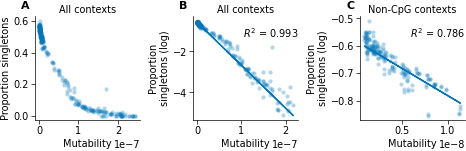

In [11]:
fig, axs = plt.subplots(1,3, figsize=(12*cm,4*cm), layout="constrained")

plot_ps_vs_mu(axs[0], x, y)
plot_ps_vs_mu_regression(axs[1], x1, np.log(y1), model, ylabel="Proportion\nsingletons (log)")
plot_ps_vs_mu_regression(axs[2], x2, np.log(y2), model2, ylabel="Proportion\nsingletons (log)", title="Non-CpG contexts")

for a, s in zip(axs, list("ABC")):
    panel_label(a,s)
    
plt.savefig("../plots/maps_model.svg", format="svg")
plt.savefig("../plots/maps_model.png", format="png", dpi=1000)